### Deliverable 1: Preprocessing the Data for a Neural Network

In [212]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.metrics import r2_score

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [213]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME", "USE_CASE", "ORGANIZATION"])
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,1,0,N,5000,1
1,T3,Independent,C2000,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,1,0,N,5000,0
3,T3,CompanySponsored,C2000,1,10000-24999,N,6692,1
4,T3,Independent,C1000,1,100000-499999,N,142590,1


In [214]:
# Determine the number of unique values in each column.
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [215]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

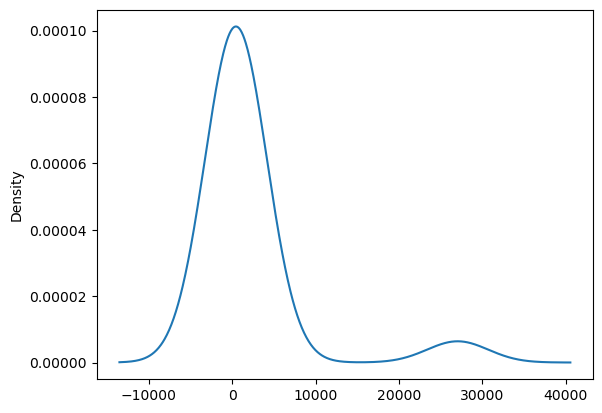

In [216]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [217]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 276].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [218]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

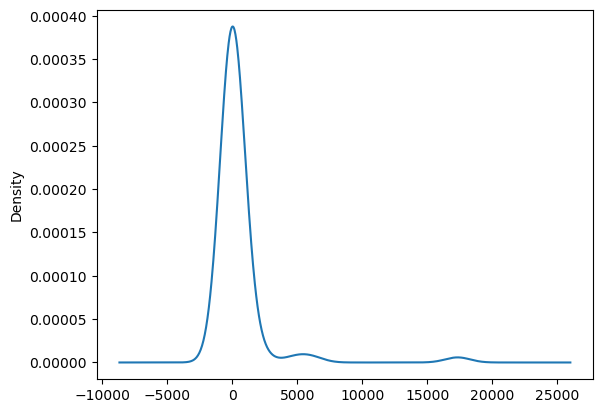

In [219]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [220]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [221]:
# Generate our categorical variable lists
app_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [222]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

C:\Users\jhillman\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [223]:
# Merge one-hot encoded features and drop the originals
enc_application_df = application_df.merge(encode_df,left_index=True, right_index=True)
enc_application_df = enc_application_df.drop(app_cat,1)
enc_application_df.head()

C:\Users\jhillman\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [224]:
# Split our preprocessed data into our features and target arrays
y = enc_application_df.IS_SUCCESSFUL.values
X = enc_application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [225]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

Attempt 1: drop "USE_CASE" and "ORGANIZATION" columns

In [226]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                2800      
                                                                 
 dense_5 (Dense)             (None, 30)                2430      
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________


In [227]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [228]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [229]:
# Create a callback that saves the model's weights every 5 epochs
callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [230]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50, callbacks=[callback])

Epoch 1/50
804/804 [==============================] - 1s 891us/step - loss: 106548.4688 - accuracy: 0.4923
Epoch 2/50
804/804 [==============================] - 1s 945us/step - loss: 63871.0195 - accuracy: 0.4990
Epoch 3/50
804/804 [==============================] - 1s 886us/step - loss: 18670.4004 - accuracy: 0.4886
Epoch 4/50
804/804 [==============================] - 1s 955us/step - loss: 60555.3086 - accuracy: 0.4941
Epoch 5/50
757/804 [===========================>..] - ETA: 0s - loss: 19345.0723 - accuracy: 0.4951
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 962us/step - loss: 18230.5000 - accuracy: 0.4990
Epoch 6/50
804/804 [==============================] - 1s 828us/step - loss: 44956.6875 - accuracy: 0.5001
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 22656.6367 - accuracy: 0.5064
Epoch 8/50
804/804 [==============================] - 1s 859us/step - loss: 18496.1621 - accuracy: 0.5077
Epoch 9/50


In [231]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7153 - accuracy: 0.6914 - 239ms/epoch - 892us/step
Loss: 0.7152935266494751, Accuracy: 0.691428542137146


Attempt 2: Additional Hidden Layers and Neurons

In [232]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               3500      
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 25)                1275      
                                                                 
 dense_10 (Dense)            (None, 1)                 26        
                                                                 
Total params: 9,851
Trainable params: 9,851
Non-trainable params: 0
_________________________________________________________________


In [233]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [234]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [235]:
# Create a callback that saves the model's weights every 5 epochs
callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [236]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50, callbacks=[callback])

Epoch 1/50
804/804 [==============================] - 1s 948us/step - loss: 38933.6289 - accuracy: 0.4994
Epoch 2/50
804/804 [==============================] - 1s 995us/step - loss: 37848.9570 - accuracy: 0.4919
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 10180.4277 - accuracy: 0.4890
Epoch 4/50
804/804 [==============================] - 1s 965us/step - loss: 17687.1172 - accuracy: 0.4836
Epoch 5/50
747/804 [==========================>...] - ETA: 0s - loss: 10260.6416 - accuracy: 0.4933
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 978us/step - loss: 10690.4004 - accuracy: 0.4939
Epoch 6/50
804/804 [==============================] - 1s 979us/step - loss: 4177.2837 - accuracy: 0.5008
Epoch 7/50
804/804 [==============================] - 1s 928us/step - loss: 90.5868 - accuracy: 0.5324
Epoch 8/50
804/804 [==============================] - 1s 988us/step - loss: 0.7496 - accuracy: 0.5324
Epoch 9/50
804/804 [

In [237]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7014 - accuracy: 0.5326 - 399ms/epoch - 1ms/step
Loss: 0.7013925909996033, Accuracy: 0.5325947403907776


Attempt 3: Additional Hidden Layers and Neurons AND different activation functions

In [238]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               3500      
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 9,851
Trainable params: 9,851
Non-trainable params: 0
_________________________________________________________________


In [239]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [240]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [241]:
# Create a callback that saves the model's weights every 5 epochs
callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [242]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50, callbacks=[callback])

Epoch 1/50
804/804 [==============================] - 2s 1ms/step - loss: 0.6923 - accuracy: 0.5280
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5308
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5281
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5319
Epoch 5/50
744/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5310
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.5322
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5301
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5287
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 9/50
804/804 [==============================] - 1s 2ms/s

In [243]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6912 - accuracy: 0.5324 - 358ms/epoch - 1ms/step
Loss: 0.6911810040473938, Accuracy: 0.5323615074157715


Attempt 4: Additional Hidden Layers and Neurons AND different activation functions AND more epochs

In [244]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 25


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 200)               7000      
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 32,201
Trainable params: 32,201
Non-trainable params: 0
_________________________________________________________________


In [245]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [246]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [247]:
# Create a callback that saves the model's weights every 5 epochs
callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [248]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6943 - accuracy: 0.5232
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5262
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5288
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5305
Epoch 5/100
781/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5348
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5331
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5287
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5267
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5303
Epoch 9/100
804/804 [==============================] -

533/804 [==================>...........] - ETA: 0s - loss: 0.6924 - accuracy: 0.5287
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5283
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.5244
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5268
Epoch 68/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6922 - accuracy: 0.5291
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5243
Epoch 70/100
503/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6919 - accuracy: 0.5280
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5264
Epoch 72/100
804/804 

In [249]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6913 - accuracy: 0.5324 - 317ms/epoch - 1ms/step
Loss: 0.6912814378738403, Accuracy: 0.5323615074157715


Attempt 5: Less hidden layers

In [250]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
#hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 80)                2800      
                                                                 
 dense_20 (Dense)            (None, 1)                 81        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [251]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [252]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [253]:
# Create a callback that saves the model's weights every 5 epochs
callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [254]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50, callbacks=[callback])

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 78251.3594 - accuracy: 0.4878
Epoch 2/50
804/804 [==============================] - 1s 870us/step - loss: 56045.3398 - accuracy: 0.4881
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 7728.0522 - accuracy: 0.5262
Epoch 4/50
804/804 [==============================] - 1s 903us/step - loss: 64662.0977 - accuracy: 0.4996
Epoch 5/50
756/804 [===========================>..] - ETA: 0s - loss: 67500.0391 - accuracy: 0.5107
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 903us/step - loss: 63547.0625 - accuracy: 0.5129
Epoch 6/50
804/804 [==============================] - 1s 942us/step - loss: 11355.2168 - accuracy: 0.5179
Epoch 7/50
804/804 [==============================] - 1s 906us/step - loss: 62745.7188 - accuracy: 0.4850
Epoch 8/50
804/804 [==============================] - 1s 937us/step - loss: 42887.1914 - accuracy: 0.4990
Epoch 9/50
804/

In [255]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 3.6259 - accuracy: 0.6862 - 233ms/epoch - 871us/step
Loss: 3.6258704662323, Accuracy: 0.6861807703971863


In [256]:
predictions = nn.predict(X_test_scaled)
nn_r2 = r2_score(y_test, predictions)
nn_r2

268/268 [==============================] - 0s 736us/step


-0.217337226366201

In [257]:
print(number_input_features)

34


In [ ]:
!pip install keras-tuner

In [258]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
#hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="leaky_relu")
)

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 80)                2800      
                                                                 
 dense_22 (Dense)            (None, 1)                 81        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [259]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [260]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [261]:
# Create a callback that saves the model's weights every 5 epochs
callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [262]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=150, callbacks=[callback])

Epoch 1/150
804/804 [==============================] - 1s 874us/step - loss: 37164.6211 - accuracy: 0.5004
Epoch 2/150
804/804 [==============================] - 1s 852us/step - loss: 41225.7969 - accuracy: 0.5015
Epoch 3/150
804/804 [==============================] - 1s 1ms/step - loss: 53120.1992 - accuracy: 0.5056
Epoch 4/150
804/804 [==============================] - 1s 967us/step - loss: 40561.4570 - accuracy: 0.5017
Epoch 5/150
733/804 [==========================>...] - ETA: 0s - loss: 20182.1445 - accuracy: 0.5133
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 928us/step - loss: 22895.8086 - accuracy: 0.5104
Epoch 6/150
804/804 [==============================] - 1s 929us/step - loss: 49495.1367 - accuracy: 0.5259
Epoch 7/150
804/804 [==============================] - 1s 961us/step - loss: 41477.2109 - accuracy: 0.4975
Epoch 8/150
804/804 [==============================] - 1s 960us/step - loss: 37421.3867 - accuracy: 0.5154
Epoc

804/804 [==============================] - 1s 1ms/step - loss: 15470.7334 - accuracy: 0.5253
Epoch 62/150
804/804 [==============================] - 1s 1ms/step - loss: 34971.1328 - accuracy: 0.5093
Epoch 63/150
804/804 [==============================] - 1s 887us/step - loss: 20064.0840 - accuracy: 0.5066
Epoch 64/150
804/804 [==============================] - 1s 965us/step - loss: 28562.3164 - accuracy: 0.5139
Epoch 65/150
528/804 [==================>...........] - ETA: 0s - loss: 4644.4033 - accuracy: 0.5317
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 25760.5645 - accuracy: 0.5258
Epoch 66/150
804/804 [==============================] - 1s 1ms/step - loss: 8254.9873 - accuracy: 0.5155
Epoch 67/150
804/804 [==============================] - 1s 992us/step - loss: 31047.7480 - accuracy: 0.5288
Epoch 68/150
804/804 [==============================] - 1s 1ms/step - loss: 16189.3740 - accuracy: 0.5465
Epoch 69/150
804/8

804/804 [==============================] - 1s 1ms/step - loss: 12852.3447 - accuracy: 0.5065
Epoch 122/150
804/804 [==============================] - 1s 866us/step - loss: 8511.8506 - accuracy: 0.5041
Epoch 123/150
804/804 [==============================] - 1s 978us/step - loss: 8612.7227 - accuracy: 0.5070
Epoch 124/150
804/804 [==============================] - 1s 851us/step - loss: 6706.0889 - accuracy: 0.5141
Epoch 125/150
281/804 [=========>....................] - ETA: 0s - loss: 4234.9829 - accuracy: 0.5097
Epoch 125: saving model to checkpoints\weights.125.hdf5
804/804 [==============================] - 1s 894us/step - loss: 4106.7568 - accuracy: 0.5042
Epoch 126/150
804/804 [==============================] - 1s 809us/step - loss: 15586.0908 - accuracy: 0.4988
Epoch 127/150
804/804 [==============================] - 1s 900us/step - loss: 5068.9248 - accuracy: 0.4882
Epoch 128/150
804/804 [==============================] - 1s 875us/step - loss: 9193.9336 - accuracy: 0.4978
Epoch 

In [263]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 3.8180 - accuracy: 0.5324 - 256ms/epoch - 957us/step
Loss: 3.8179779052734375, Accuracy: 0.5323615074157715


In [267]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [268]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [269]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 500 Complete [00h 01m 48s]
val_accuracy: 0.7236151695251465

Best val_accuracy So Far: 0.7252478003501892
Total elapsed time: 02h 00m 13s
INFO:tensorflow:Oracle triggered exit


In [270]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 5,
 'num_layers': 2,
 'units_0': 5,
 'units_1': 7,
 'units_2': 5,
 'units_3': 3,
 'units_4': 9,
 'units_5': 1,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 4,
 'tuner/round': 4,
 'tuner/trial_id': '0391'}

In [271]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5671 - accuracy: 0.7252 - 290ms/epoch - 1ms/step
Loss: 0.5671166777610779, Accuracy: 0.7252478003501892


In [273]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")